<a href="https://colab.research.google.com/github/elena20po/FFNN-Tih-Don/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22_%D0%92%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81_%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B5%D0%B9%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def norm(text):
  words = text.split()
  newtext = ''
  for w in words:
    wn = morph.parse(w)[0].normal_form
    newtext = newtext + wn + ' '
  return newtext #text

In [ ]:
print(norm("Иван родил и бегал"))

иван родить и бегать 


In [ ]:
 !ls

Mycontent  sample_data


In [ ]:
filename = "Writers_texts1.zip"

In [ ]:
cd /content/Mycontent/Testtext

/content/Mycontent/Testtext


In [ ]:
!unzip $filename

Archive:  Writers_texts1.zip
replace (Александр Серафимович) Обучающая_2 вместе.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Александр Серафимович) Обучающая_2 вместе.txt  
replace (Александр Серафимович) Тестовая_2 вместе.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Александр Серафимович) Тестовая_2 вместе.txt  
replace (Андрей Платонов) Обучающая.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Андрей Платонов) Обучающая.txt  
replace (Андрей Платонов) Тестовая.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Андрей Платонов) Тестовая.txt  
replace (Максим Горький) Обучающая.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Максим Горький) Обучающая.txt  
replace (Максим Горький) Тестовая.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy
  inflating: (Максим Горький) Тестовая.txt  
replace (Михаил Булгаков ) Обучающая.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: (Михаил Булгаков ) Обучающая.txt  
replace (Михаил Булгак

In [ ]:
def replaceMultiple(mainString, toBeReplaces, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplaces:
        # Check if string is in the main string
        if elem in mainString:
            # Replace the string
            mainString = mainString.replace(elem, newString)
    
    return  mainString

In [ ]:
txt = replaceMultiple("Тестовая - запись — верна", ['\n\r', '\n', '\r', '-', '—'] , " ")
print(txt)

Тестовая   запись   верна


In [ ]:
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #открываем файла в режиме чтения
  text = f.read()                #читаем текст
  text = replaceMultiple(text, ['\n\r', '\n', '\r', '\xa0'] , " ") #заменяем переносы и спецсимволы разделителей на пробелы
  #return text                    #функция возвращает текст файла
  return norm(text)                    #функция возвращает текст файла

In [ ]:
#Загружаем обучающие тексты
trainText = []
trainText.append(readText('(Александр Серафимович) Обучающая_2 вместе.txt'))
trainText.append(readText('(Андрей Платонов) Обучающая.txt'))
trainText.append(readText('(Максим Горький) Обучающая.txt'))
trainText.append(readText('(Михаил Булгаков ) Обучающая.txt'))
trainText.append(readText('(Михаил Шолохов) Обучающая.txt'))
trainText.append(readText('(Федор Крюков) Обучающая_12 вместе.txt'))
className = ["Александр Серафимович", "Андрей Платонов", "Максим Горький", "Михаил Булгаков", "Михаил Шолохов", "Федор Крюков"]
nClasses = len(className)


In [ ]:
#Загружаем тестовые тексты
testText = []
testText.append(readText('(Александр Серафимович) Тестовая_2 вместе.txt'))
testText.append(readText('(Андрей Платонов) Тестовая.txt'))
testText.append(readText('(Максим Горький) Тестовая.txt'))
testText.append(readText('(Михаил Булгаков) Тестовая.txt'))
testText.append(readText('(Михаил Шолохов) Тестовая.txt'))
testText.append(readText('(Федор Крюков) Тестовая_9 вместе.txt'))
#Смотрим размеры загруженных выборок
for i in range(len(trainText)):
  print("Длина обучающего текста", className[i], "\t", len(trainText[i]), "\tПроверочного:", "\t", len(testText[i]))

Длина обучающего текста Александр Серафимович 	 289912 	Проверочного: 	 293302
Длина обучающего текста Андрей Платонов 	 1237798 	Проверочного: 	 537118
Длина обучающего текста Максим Горький 	 465486 	Проверочного: 	 2115967
Длина обучающего текста Михаил Булгаков 	 744128 	Проверочного: 	 165437
Длина обучающего текста Михаил Шолохов 	 1310238 	Проверочного: 	 1564079
Длина обучающего текста Федор Крюков 	 750871 	Проверочного: 	 615867


In [ ]:
maxWordsCount = 30000 #макс. кол-во слов/индексов для обучения текстов
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&amp;amp;()*+,-./:;&amp;lt;=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(trainText) #передаем тексты для получения токенов отсортированных по частоте повторяемости в количестве maxWordsCount
items = list(tokenizer.word_index.items()) #берем индексы слов для просмотра
print(items[:100])

[('и', 1), ('в', 2), ('он', 3), ('не', 4), ('на', 5), ('с', 6), ('а', 7), ('что', 8), ('я', 9), ('быть', 10), ('она', 11), ('как', 12), ('то', 13), ('ты', 14), ('к', 15), ('по', 16), ('они', 17), ('это', 18), ('но', 19), ('за', 20), ('у', 21), ('свой', 22), ('из', 23), ('всё', 24), ('от', 25), ('же', 26), ('так', 27), ('вы', 28), ('один', 29), ('весь', 30), ('мы', 31), ('этот', 32), ('о', 33), ('сказать', 34), ('человек', 35), ('какой', 36), ('вот', 37), ('бы', 38), ('да', 39), ('тот', 40), ('сам', 41), ('себя', 42), ('уже', 43), ('когда', 44), ('который', 45), ('до', 46), ('стать', 47), ('ещё', 48), ('только', 49), ('ну', 50), ('под', 51), ('кто', 52), ('ни', 53), ('давыдов', 54), ('такой', 55), ('чтобы', 56), ('мочь', 57), ('рука', 58), ('нет', 59), ('где', 60), ('для', 61), ('глаз', 62), ('или', 63), ('теперь', 64), ('говорить', 65), ('тут', 66), ('время', 67), ('без', 68), ('там', 69), ('идти', 70), ('два', 71), ('надо', 72), ('лицо', 73), ('дело', 74), ('мой', 75), ('жить', 76), (

График частоты слов


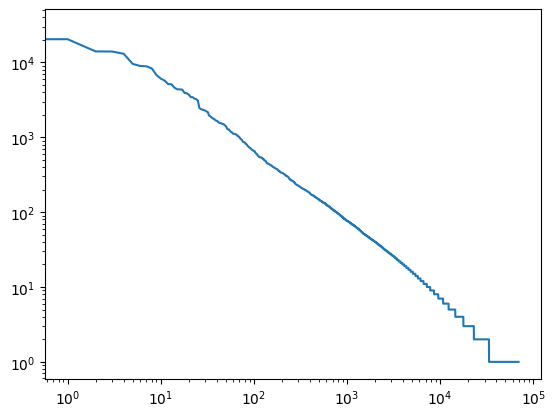

In [ ]:
print("График частоты слов")
foo=[]
for w in items:
  foo.append(tokenizer.word_counts[w[0]])
plt.plot(foo)
plt.loglog()
plt.show()

In [ ]:
print(tokenizer.word_index['и']) #позиция/индекс слова в массиве токенов
print(tokenizer.word_docs['и']) #в скольких источниках встретилось слово
print(tokenizer.word_counts['и']) #количество повторений слов


1
6
30788


In [ ]:
dist = list(tokenizer.word_counts.items())#вывод предложений с частотой для каждого слова
print(dist[:30])
print(trainText[2][:150])

[('серафимович', 7), ('александр', 60), ('бабий', 55), ('деревня', 83), ('это', 4336), ('быть', 6775), ('в', 20435), ('восемнадцатый', 11), ('году', 31), ('по', 4385), ('кочка', 3), ('и', 30788), ('корневище', 8), ('долго', 383), ('ехать', 162), ('сергей', 84), ('куда', 492), ('ни', 1285), ('глянешь', 2), ('пни', 5), ('вырубка', 1), ('или', 1107), ('глухие', 2), ('молчаливый', 46), ('сосны', 7), ('дикий', 59), ('место', 447), ('от', 3231), ('железный', 134), ('дорога', 295)]
максим горький дело артамонов i год через два после воля (т.е. после отмена крепостной право в 1861 г. - ред.), за обедня в день преображение господни


In [ ]:
count_thres = 3 #кол-во раз меньше которого слово нужно исключить из списка  
low_count_words = [w for w,c in tokenizer.word_counts.items() if c < count_thres] #создаем список слов встречаюихся менее count_thres 
print(len(low_count_words))
print(low_count_words[:100])
for w in low_count_words: #удаляем такие слова из исходного списка
    del tokenizer.word_index[w]
    del tokenizer.word_docs[w]
    del tokenizer.word_counts[w]

10433
['глянешь', 'глухие', 'кнутовищем', 'блюдце', 'медком', 'разоряют', 'колчака', 'погнали', 'послышим', 'загнала', 'чижолый', 'справишься', 'изз', 'комитета', 'белена', 'красными', 'опали', 'голодно', 'многосемейный', 'галдели', 'бесперечь', 'плуги', 'запрягем', 'нукай', 'выпали', 'напечь', 'моем', 'работай', 'детишками', 'кажной', 'герои', 'захлопать', 'надоумил', 'переговариваться', 'електричество', 'дохтор', 'мельнице', 'приснился', 'взбеленился', 'устроили', 'спросясь', 'возбужденные', 'лопнул', 'обороняться', 'отряхнуться', 'укатать', 'споро', 'кэ', 'обмёрзнуть', 'пе', 'родителям', 'хмыкал', 'сборник', 'новь', 'охриплый', 'матку', 'тысячеголосый', 'торговцев', 'переселенцев', 'люльки', 'подвешивать', 'повылазило', 'вышина', 'арбами', 'неохватить', 'гимнастерках', 'воронёный', 'батальонные', 'ротные', 'дослужиться', 'парикмахеры', 'рыбак', 'вашу', 'свинца', 'шила', 'надсаживаясь', 'сказывали', 'потянулись', 'було', 'неприкаянный', 'отдалиться', 'кричащий', 'пулемётчик', 'вмисть

In [ ]:
items = list(tokenizer.word_index.items()) #берем индексы слов для просмотра

In [ ]:
print("В словаре осталось ", len(tokenizer.word_counts.items()), " слов")

В словаре осталось  22997  слов


График частоты слов после удаления наименее частых


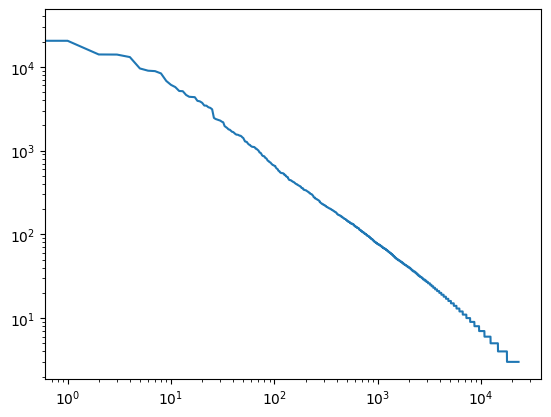

In [ ]:
print("График частоты слов после удаления наименее частых")
foo=[]
for w in items:
  foo.append(tokenizer.word_counts[w[0]])
plt.plot(foo)
plt.loglog()
plt.show()

In [ ]:
#словари для каждого автора
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы
print("Исходный текст:\t\t", trainText[0] [:97])
print("Он же в виде последовательности индексов:\t", trainWordIndexes[0][:20])

Исходный текст:		 серафимович александр бабий деревня александр серафимович бабий деревня это быть в восемнадцатый 
Он же в виде последовательности индексов:	 [9540, 1307, 1414, 917, 1307, 9540, 1414, 917, 18, 10, 2, 6628, 2550, 16, 17746, 1, 8596, 173, 449, 907]


In [ ]:
print() 
print("Статистика по обучающим текстам:") 
symbs = 0; 
words = 0; 
for i in range(len(trainText)): 
  print(className[i], "\t", len(trainText[i]), "символов,", len(trainWordIndexes[i]), " слов") 
  symbs += len(trainText[i]) 
  words += len(trainWordIndexes[i])


Статистика по обучающим текстам:
Александр Серафимович 	 289912 символов, 39403  слов
Андрей Платонов 	 1237798 символов, 184320  слов
Максим Горький 	 465486 символов, 67042  слов
Михаил Булгаков 	 744128 символов, 106883  слов
Михаил Шолохов 	 1310238 символов, 189783  слов
Федор Крюков 	 750871 символов, 102817  слов


In [ ]:
print() 
print("Статистика по проверочным текстам:") 
symbs = 0; 
words = 0; 
for i in range(len(testText)): 
  print(className[i], "\t", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов") 
  symbs += len(testText[i]) 
  words += len(testWordIndexes[i])


Статистика по проверочным текстам:
Александр Серафимович 	 293302  символов,  38971  слов
Андрей Платонов 	 537118  символов,  71393  слов
Максим Горький 	 2115967  символов,  273342  слов
Михаил Булгаков 	 165437  символов,  21278  слов
Михаил Шолохов 	 1564079  символов,  205348  слов
Федор Крюков 	 615867  символов,  79558  слов


In [ ]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, shift):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Выбираем" блоки текст длины xLen и смещаемся вперёд на shift
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += shift
    
  return xSample

In [ ]:
print(max(trainWordIndexes[0]))

NameError: ignored

In [ ]:
arr = to_categorical(trainWordIndexes[0])
print(len(trainWordIndexes[0]))
print(arr.shape)
print(trainWordIndexes[0][:10])
print(arr[:20])


39403
(39403, 18545)
[9540, 1307, 1414, 917, 1307, 9540, 1414, 917, 18, 10]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def createSetsMultiClasses(wordIndexes, xLen, step):
  #Для каждого из классов создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной по количеству классов" 
  for t, wI in enumerate(wordIndexes):  
    tmp = getSetFromIndexes(wI, xLen, step) #получаем список индексов, разбитый на "кол-во окон * длину окна" 
    xSamples += tmp
    ySamples += [utils.to_categorical(t, nClasses).tolist()] * len(tmp)
    
  return (np.array(xSamples), np.array(ySamples))  

In [ ]:
#Задаём базовые параметры
xLen = 7000 #Длина отрезка текста в результирующемвекторе в словах
shift= 100 #Смещение окна для разбиения исходного текста на обучающие вектора
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, shift) #Формируем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, shift)    #Формируем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)


(6486, 7000)
(6486, 6)
(6481, 7000)
(6481, 6)


In [ ]:
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) #Конвертируем xTrain в список перед передачей методу
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) #Конвертируем xTest в список перед передачей методу
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][100:120]) #фрагмент набора слов в виде Bag of Words

(6486, 30000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]


In [ ]:
print("Подсчитаем количество единичек в первом блоке - ", len([v for v in xTrain01[0] if v == 1]))

Подсчитаем количество единичек в первом блоке -  2444


Epoch 1/20
51/51 [==============================] - 8s 135ms/step - loss: 0.2543 - accuracy: 0.9642 - val_loss: 0.6889 - val_accuracy: 0.9506
Epoch 2/20
51/51 [==============================] - 6s 112ms/step - loss: 0.0989 - accuracy: 0.9966 - val_loss: 0.7859 - val_accuracy: 0.8809
Epoch 3/20
51/51 [==============================] - 5s 95ms/step - loss: 0.0657 - accuracy: 0.9978 - val_loss: 0.7742 - val_accuracy: 0.9353
Epoch 4/20
51/51 [==============================] - 5s 93ms/step - loss: 0.0493 - accuracy: 0.9986 - val_loss: 0.6363 - val_accuracy: 0.9506
Epoch 5/20
51/51 [==============================] - 7s 133ms/step - loss: 0.0413 - accuracy: 0.9977 - val_loss: 0.5458 - val_accuracy: 0.9506
Epoch 6/20
51/51 [==============================] - 5s 94ms/step - loss: 0.0330 - accuracy: 0.9981 - val_loss: 0.4315 - val_accuracy: 0.9568
Epoch 7/20
51/51 [==============================] - 5s 93ms/step - loss: 0.0273 - accuracy: 0.9989 - val_loss: 0.3511 - val_accuracy: 0.9588
Epoch 8/20

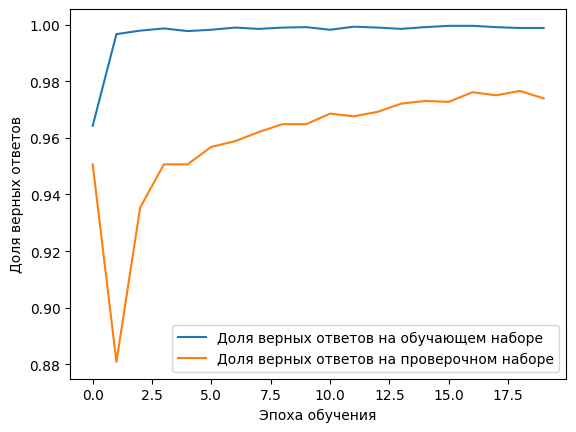

In [ ]:
#Создаём полносвязную сеть (FeedForward Neural Network)
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(30, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.4))
model01.add(BatchNormalization())
model01.add(Dense(len(trainText), activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01,yTest)
                      )
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


In [ ]:
model01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 30000)            120000    
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 30)                900030    
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 6)                 186       
                                                                 
Total params: 1,020,336
Trainable params: 960,276
Non-

In [ ]:
def prepareTextForRecognition(testText, xLen, shift): #функция принимает последовательность индексов, размер окна, смещение окна
  testWordIndexes = tokenizer.texts_to_sequences([testText]) 
  print("Source text:",testText[:100])
  print("Indexes:",testWordIndexes[0][:10])
  print(len(testWordIndexes[0]))
  sample = getSetFromIndexes(testWordIndexes[0], xLen, shift)
  print("Number of text blocks of xLen:", len(sample))
  xTest = tokenizer.sequences_to_matrix(sample)
 
  return np.array(xTest)

srcTextBOW = prepareTextForRecognition(testText[4], xLen, shift)
#Получаем результаты распознавания класса по блокам слов длины xLen
currPred = model01.predict(srcTextBOW)
print(currPred.shape)
print(currPred[:2])
#Определяем номер распознанного класса для каждого блока слов длины xLen
currOut = np.argmax(currPred, axis=1)
print(currOut)

Source text: с шолохов михаил тихий дон (книга 3 и 4) михаил шолохов тихий дон (книга 3,4) как ты, батюшка, славн
Indexes: [6, 962, 542, 1189, 1056, 1989, 1, 1463, 962, 542]
205348
Number of text blocks of xLen: 1984
62/62 [==============================] - 1s 8ms/step
(1984, 6)
[[0.5983258  0.20427506 0.3522615  0.22990501 0.9958618  0.69637907]
 [0.59942794 0.19963832 0.35531345 0.23552325 0.9960548  0.68534625]]
[4 4 4 ... 4 4 4]


In [ ]:
probability = [0]*nClasses
for i in range(len(testText)): #Проходим по всем 6 классам и считаем вероятность отнесения текста к каждому из классов
  probability[i] = np.count_nonzero(currOut == i)/len(currOut)
print(probability)
recognizedClass = np.argmax(probability)
print("Текст написан:", className[recognizedClass], "с вероятностью", probability[recognizedClass])

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
Текст написан: Михаил Шолохов с вероятностью 1.0


In [ ]:
!pip install -Uqq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [ ]:
#%pdb on
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"

  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, shift)

In [ ]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

10/10 [==============================] - 0s 10ms/step
Александр Серафимович  распознано  47 % сеть считает, что это  Александр Серафимович ,  распознано ВЕРНО!
21/21 [==============================] - 0s 12ms/step
Андрей Платонов  распознано  100 % сеть считает, что это  Андрей Платонов ,  распознано ВЕРНО!
84/84 [==============================] - 1s 10ms/step
Максим Горький  распознано  100 % сеть считает, что это  Максим Горький ,  распознано ВЕРНО!
5/5 [==============================] - 0s 9ms/step
Михаил Булгаков  распознано  100 % сеть считает, что это  Михаил Булгаков ,  распознано ВЕРНО!
62/62 [==============================] - 1s 10ms/step
Михаил Шолохов  распознано  100 % сеть считает, что это  Михаил Шолохов ,  распознано ВЕРНО!
23/23 [==============================] - 0s 6ms/step
Федор Крюков  распознано  100 % сеть считает, что это  Федор Крюков ,  распознано ВЕРНО!

Средний процент распознавания  97 %



# Новый раздел